In [1]:
import os, time, csv, copy

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import cPickle as pickle

from IPython.display import display
from IPython.display import Audio

import librosa, dtw

%matplotlib inline

In [2]:
from faligner import faligner

### Enrollment speech segmentation

In [3]:
#params
audio_path = './raw_audio/Elia_sd.m4a'
template_path = 'template/repeated_sentence_template.flac'
transcript_path = 'template/repeated_sentence_anchors.txt'
RATE = 16000.

In [4]:
d = faligner(audio_path, template_path, transcript_path, sr=RATE, output='data')

In [5]:
len(d)

9

In [6]:
Audio(data=d[7], rate=RATE)

### Single sentence segmentation

In [7]:
#template audio
template_path = 'template/sentence_template.flac'
transcript_path = 'template/sentence_anchors.txt'
audio_path='test.flac'
test_data = d[7]
librosa.output.write_wav(audio_path, y=test_data, sr=RATE)

In [11]:
dw = faligner(audio_path, template_path, transcript_path, 
             sr=RATE, mel_params={'hop_length': 256}, output='data', padding=10)

In [12]:
print len(dw)

10


In [13]:
for i in range(len(dw)):
    display(Audio(data=dw[i], rate=RATE, autoplay=False))

TODO:
- tsne visualisation of embedding all words per person (i.e. the 9 sentences each)
- template library as hdf5 file - perhaps w male/female groups - path fed into aligner object

### Generate word data for each user

In [3]:
#strings
s_template_path = 'template/repeated_sentence_template.flac' #sentence template
s_transcript_path = 'template/repeated_sentence_anchors.txt'
w_template_path = 'template/sentence_template.flac' #word template
w_transcript_path = 'template/sentence_anchors.txt'
RATE = 16000.

In [6]:
#create basic Tree struct for storing the words
from collections import defaultdict
def Tree(): return defaultdict(Tree)

In [28]:
#initialise the data tree
audio_tree = Tree()

#specify the name of the words
enroll_words = ['hello', 'my', 'pass', 'word', 'is', 'X', 'Y', 'Z', 'verify', 'me']

#loop through files in raw_audio directory
audio_root = 'raw_audio'
for name in os.listdir(audio_root):
    
    #align the whole sentences
    speakerid, ext = name.split('.')
    path = os.path.join(audio_root, name)
    print path
    
    enrollments = faligner(path, s_template_path, s_transcript_path, sr=RATE, output='data')
    
    for enrollment_ind, enrollment in enumerate(enrollments):
        
        #align the individual sentence
        audio_path='test.flac'
        librosa.output.write_wav(audio_path, y=enrollment, sr=RATE)
        word_data = faligner(audio_path, template_path, transcript_path, \
                     sr=RATE, mel_params={'hop_length': 256}, output='data', padding=10)
        
        for word, word_datum in zip(enroll_words, word_data):
            
            #store the data
            print speakerid, enrollment_ind, word
            audio_tree[speakerid][enrollment_ind][word] = word_datum

raw_audio/XXZ.m4a
XXZ 0 hello
XXZ 0 my
XXZ 0 pass
XXZ 0 word
XXZ 0 is
XXZ 0 X
XXZ 0 Y
XXZ 0 Z
XXZ 0 verify
XXZ 0 me
XXZ 1 hello
XXZ 1 my
XXZ 1 pass
XXZ 1 word
XXZ 1 is
XXZ 1 X
XXZ 1 Y
XXZ 1 Z
XXZ 1 verify
XXZ 1 me
XXZ 2 hello
XXZ 2 my
XXZ 2 pass
XXZ 2 word
XXZ 2 is
XXZ 2 X
XXZ 2 Y
XXZ 2 Z
XXZ 2 verify
XXZ 2 me
XXZ 3 hello
XXZ 3 my
XXZ 3 pass
XXZ 3 word
XXZ 3 is
XXZ 3 X
XXZ 3 Y
XXZ 3 Z
XXZ 3 verify
XXZ 3 me
XXZ 4 hello
XXZ 4 my
XXZ 4 pass
XXZ 4 word
XXZ 4 is
XXZ 4 X
XXZ 4 Y
XXZ 4 Z
XXZ 4 verify
XXZ 4 me
XXZ 5 hello
XXZ 5 my
XXZ 5 pass
XXZ 5 word
XXZ 5 is
XXZ 5 X
XXZ 5 Y
XXZ 5 Z
XXZ 5 verify
XXZ 5 me
XXZ 6 hello
XXZ 6 my
XXZ 6 pass
XXZ 6 word
XXZ 6 is
XXZ 6 X
XXZ 6 Y
XXZ 6 Z
XXZ 6 verify
XXZ 6 me
XXZ 7 hello
XXZ 7 my
XXZ 7 pass
XXZ 7 word
XXZ 7 is
XXZ 7 X
XXZ 7 Y
XXZ 7 Z
XXZ 7 verify
XXZ 7 me
XXZ 8 hello
XXZ 8 my
XXZ 8 pass
XXZ 8 word
XXZ 8 is
XXZ 8 X
XXZ 8 Y
XXZ 8 Z
XXZ 8 verify
XXZ 8 me
raw_audio/Luke_sd.m4a
Luke_sd 0 hello
Luke_sd 0 my
Luke_sd 0 pass
Luke_sd 0 word
Luke_sd 0 is
Luke_s

In [5]:
#write enrollment data to individual files

#loop through files in raw_audio directory
audio_root = 'raw_audio'
split_dir = 'split_enrollments'
for name in os.listdir(audio_root):
    
    #align the whole sentences
    speakerid, ext = name.split('.')
    path = os.path.join(audio_root, name)

    enrollments = faligner(path, s_template_path, s_transcript_path, 
                           sr=RATE, output='data', padding=10, mel_params={'hop_length': 512})
    
    for enroll_ind, enrollment in enumerate(enrollments):
        file_name = speakerid + str(enroll_ind) + '.wav'
        output_path = os.path.join(split_dir, file_name)
        print output_path
        librosa.output.write_wav(output_path, y=enrollment, sr=RATE)

split_enrollments/XXZ0.wav
split_enrollments/XXZ1.wav
split_enrollments/XXZ2.wav
split_enrollments/XXZ3.wav
split_enrollments/XXZ4.wav
split_enrollments/XXZ5.wav
split_enrollments/XXZ6.wav
split_enrollments/XXZ7.wav
split_enrollments/XXZ8.wav
split_enrollments/Luke_sd0.wav
split_enrollments/Luke_sd1.wav
split_enrollments/Luke_sd2.wav
split_enrollments/Luke_sd3.wav
split_enrollments/Luke_sd4.wav
split_enrollments/Luke_sd5.wav
split_enrollments/Luke_sd6.wav
split_enrollments/Luke_sd7.wav
split_enrollments/Luke_sd8.wav
split_enrollments/Charlotte_sd0.wav
split_enrollments/Charlotte_sd1.wav
split_enrollments/Charlotte_sd2.wav
split_enrollments/Charlotte_sd3.wav
split_enrollments/Charlotte_sd4.wav
split_enrollments/Charlotte_sd5.wav
split_enrollments/Charlotte_sd6.wav
split_enrollments/Charlotte_sd7.wav
split_enrollments/Charlotte_sd8.wav
split_enrollments/XYX0.wav
split_enrollments/XYX1.wav
split_enrollments/XYX2.wav
split_enrollments/XYX3.wav
split_enrollments/XYX4.wav
split_enrollments/X

In [7]:
#save/load the struct

from collections import defaultdict
def Tree(): return defaultdict(Tree)

#with open('word_audio_tree.pkl', 'wb') as f:
#    pickle.dump(tree, f)

with open('word_audio_tree.pkl', 'rb') as f:
    audio_tree = pickle.load(f)

In [9]:
#feature_extraction function
from speech_utils import features
def extract_features(signal):
    x, energy = features.fbank(signal, samplerate=16000, winlen=0.02, 
                               winstep=0.01, nfilt=64, nfft=512, lowfreq=80, 
                               highfreq=6000, preemph=0.97)
    
    #pad into constant shape
    raw = np.log(x)
    t, freq = raw.shape
    if t >= 64:
        x = raw[-64:, :] #take the end part (to deal with the head problem)
    else: #zero pad
        x = np.pad(raw, [(0,64-t), (0,0)], mode='constant')
    
    #normalise feature as an image
    feature = (x - x.mean()) / (np.std(x) + 1e-5*np.random.normal())    
    
    return feature[:,:,np.newaxis]

In [8]:
#embedding function
import json
from keras.models import model_from_config, model_from_json

model_spec = json.load(open('models/model_phonems-cnn1d.json'))
model = model_from_config(model_spec)
model.load_weights('models/model_phonems-cnn1d.h5')

Using TensorFlow backend.


In [12]:
#embedding matrices
n_samples = len(audio_tree)*9*10
speaker_data_array = np.zeros(shape=(n_samples, 192))
word_data_array = np.zeros(shape=(n_samples, 92))
id_array = np.zeros(shape=(n_samples, 3))

row_cnt = 0
for sind, speaker in enumerate(audio_tree):
    for eind, enrollment in enumerate(audio_tree[speaker]):
        for wind, word in enumerate(audio_tree[speaker][enrollment]):
            audio_data = audio_tree[speaker][enrollment][word]
            feature = extract_features(audio_data)
            speaker_embedding, word_embedding = model.predict(feature[np.newaxis,:,:,:])
            
            #create numpy array, with associated tuple list
            speaker_data_array[row_cnt] = speaker_embedding
            word_data_array[row_cnt] = word_embedding
            id_array[row_cnt] = [sind, eind, wind]
            row_cnt+=1

In [48]:
# visualisation
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [132]:
pca = PCA(n_components=200)
tsne = TSNE()

In [137]:
enrolls = np.split(speaker_data_array, len(audio_tree)*9)
X_mean = np.array([x.mean(axis=0) for x in enrolls]) #represent as mean of word representations
X_cat = np.array([np.reshape(x, (-1,)) for x in enrolls])
ids = np.repeat(np.arange(0, 20), 9)

In [138]:
X_cat = pca.fit_transform(X_cat)
X_cat = tsne.fit_transform(X_cat)
X_mean = tsne.fit_transform(X_mean)

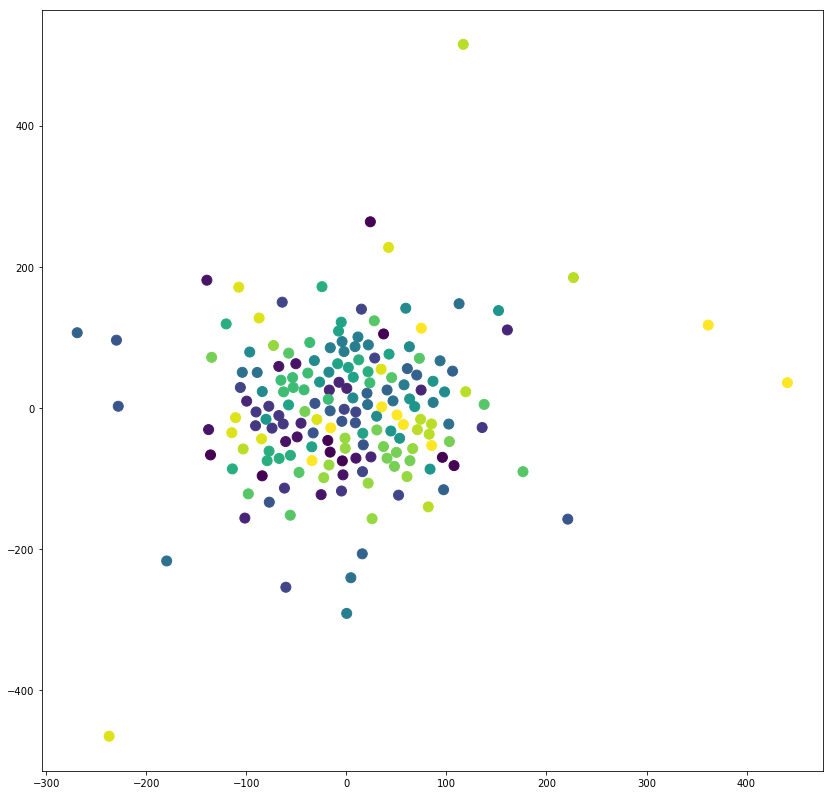

In [139]:
f, ax = plt.subplots(figsize=(14,14))
ax.scatter(X_mean[:,0], X_mean[:,1], c=ids, s=100)

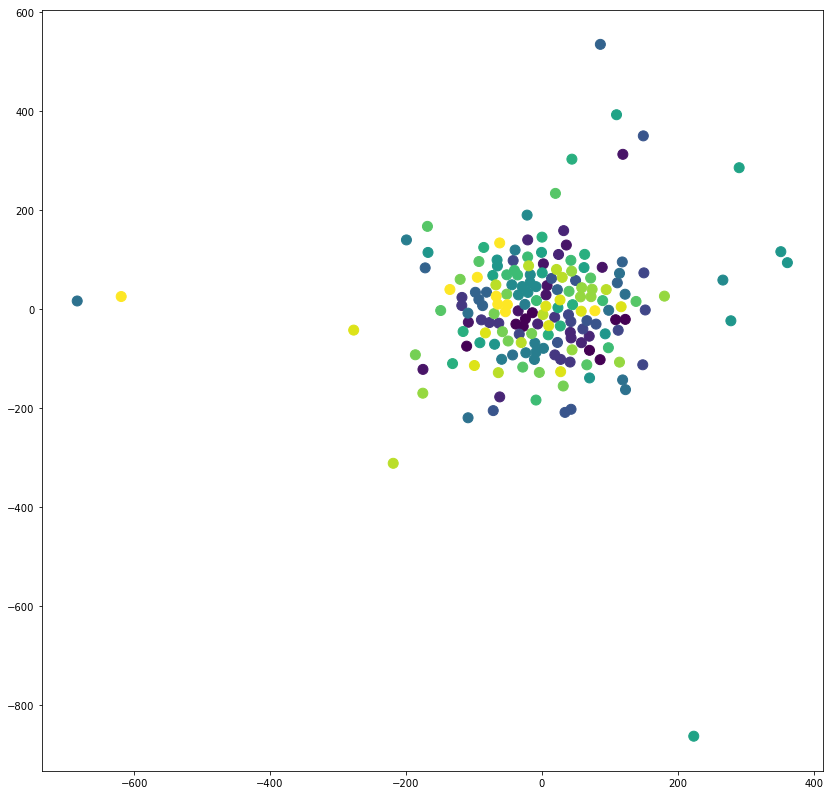

In [140]:
f, ax = plt.subplots(figsize=(14,14))
ax.scatter(X_cat[:,0], X_cat[:,1], c=ids, s=100)

In [249]:
#get convex hull of points
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from matplotlib import cm
cmap = cm.get_cmap('Vega10')

NameError: name 'X_cat' is not defined

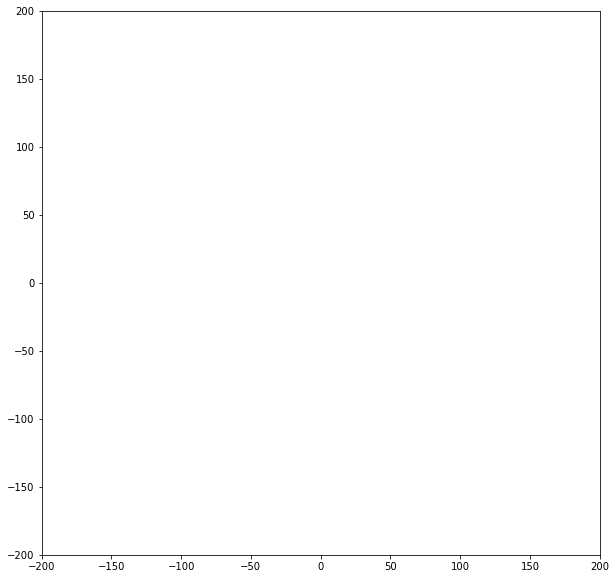

In [6]:
f, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([-200, 200])
ax.set_ylim([-200, 200])

num_subs = 5.

for sub_ind, sub in enumerate(np.split(X_cat[:45], num_subs)):
    hull = ConvexHull(sub)
    ax.scatter(sub[:,0], sub[:,1], c=cmap(sub_ind/num_subs), alpha=1, s=100)
    #for simplex in hull.simplices:
    #    ax.plot(sub[simplex, 0], sub[simplex, 1],  c=cmap(sub_ind/num_subs))
